<a href="https://colab.research.google.com/github/plaban1981/INEURON/blob/Supervised-Models/Lasso_Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to Perform Lasso and Ridge Regression in Python

A quick tutorial on how to use lasso and ridge regression to improve your linear model.

https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8

LASSO - least absolute shrinkage and selection operator

#### Next Reading https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db

In [1]:
!wget 'https://github.com/marcopeix/ISL-linear-regression/blob/master/data/Advertising.csv'


--2020-04-03 06:09:56--  https://github.com/marcopeix/ISL-linear-regression/blob/master/data/Advertising.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Advertising.csv’

Advertising.csv         [  <=>               ] 121.30K   219KB/s    in 0.6s    

2020-04-03 06:10:03 (219 KB/s) - ‘Advertising.csv’ saved [124213]



In [4]:
from google.colab import files
files.upload()

Saving Advertising.csv to Advertising.csv


{'Advertising.csv': b',TV,radio,newspaper,sales\r\n1,230.1,37.8,69.2,22.1\r\n2,44.5,39.3,45.1,10.4\r\n3,17.2,45.9,69.3,9.3\r\n4,151.5,41.3,58.5,18.5\r\n5,180.8,10.8,58.4,12.9\r\n6,8.7,48.9,75,7.2\r\n7,57.5,32.8,23.5,11.8\r\n8,120.2,19.6,11.6,13.2\r\n9,8.6,2.1,1,4.8\r\n10,199.8,2.6,21.2,10.6\r\n11,66.1,5.8,24.2,8.6\r\n12,214.7,24,4,17.4\r\n13,23.8,35.1,65.9,9.2\r\n14,97.5,7.6,7.2,9.7\r\n15,204.1,32.9,46,19\r\n16,195.4,47.7,52.9,22.4\r\n17,67.8,36.6,114,12.5\r\n18,281.4,39.6,55.8,24.4\r\n19,69.2,20.5,18.3,11.3\r\n20,147.3,23.9,19.1,14.6\r\n21,218.4,27.7,53.4,18\r\n22,237.4,5.1,23.5,12.5\r\n23,13.2,15.9,49.6,5.6\r\n24,228.3,16.9,26.2,15.5\r\n25,62.3,12.6,18.3,9.7\r\n26,262.9,3.5,19.5,12\r\n27,142.9,29.3,12.6,15\r\n28,240.1,16.7,22.9,15.9\r\n29,248.8,27.1,22.9,18.9\r\n30,70.6,16,40.8,10.5\r\n31,292.9,28.3,43.2,21.4\r\n32,112.9,17.4,38.6,11.9\r\n33,97.2,1.5,30,9.6\r\n34,265.6,20,0.3,17.4\r\n35,95.7,1.4,7.4,9.5\r\n36,290.7,4.1,8.5,12.8\r\n37,266.9,43.8,5,25.4\r\n38,74.7,49.4,45.7,14.7\r\n39,

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## function to visualize data

In [0]:
def scatter_plot(data,feature,target):
  plt.figure(figsize=(11,8))
  plt.scatter(data[feature],data[target],c='black')
  plt.xlabel(f'money spent on {feature} ads')
  plt.ylabel(f'Sales in $')
  plt.show()


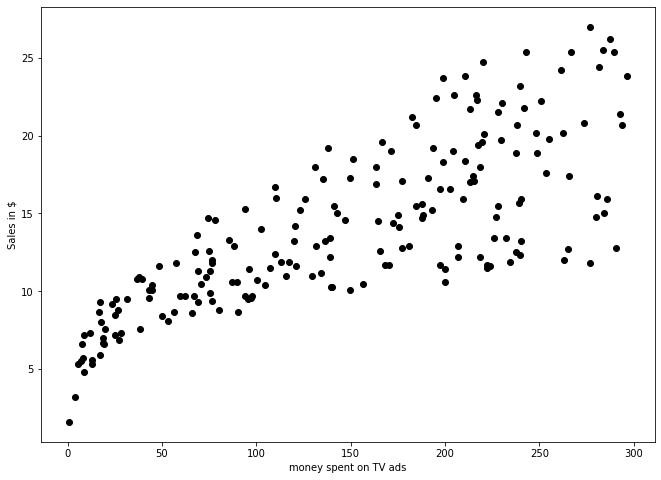

In [9]:
scatter_plot(df,'TV','sales')

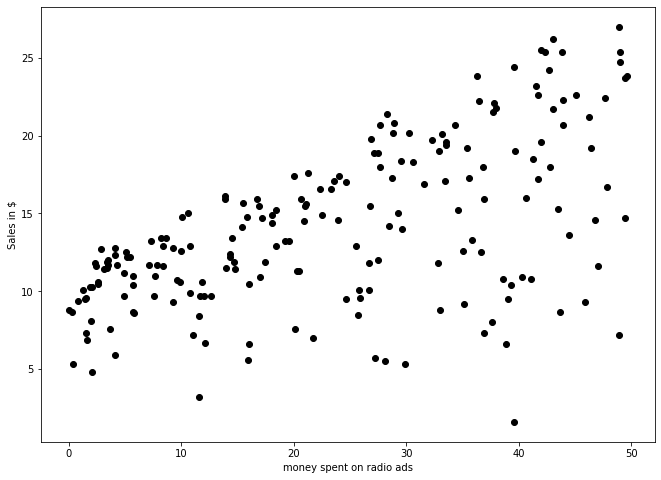

In [10]:
scatter_plot(df,'radio','sales')

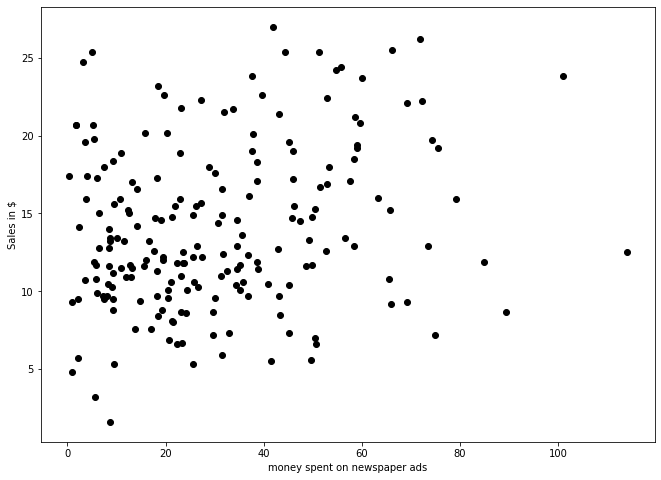

In [11]:
scatter_plot(df,'newspaper','sales')

## Modelling
**Multiple linear regression — least squares fitting**

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X = df.drop('sales',axis=1)
Y = df['sales']

linreg = LinearRegression()
mse = cross_val_score(linreg,X,Y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-3.1481607356471937


The cross_val_score will return an array of MSE for each cross-validation steps

In [14]:
print(mse)

[-3.42598966 -2.46682997 -1.58875568 -5.48178112 -2.77744724]


**Ridge regression** L2 Regularization

For ridge regression, we introduce **GridSearchCV**. 

This will allow us to automatically perform 5-fold cross-validation with a range of different regularization parameters in order to find the optimal value of **alpha**.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
rg = Ridge()
params = {'alpha':[0.001,0.01,0.1,1,5,10,20,30,40]}
rg_grid = GridSearchCV(rg,params,scoring='neg_mean_squared_error',cv=5)
rg_grid.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [18]:
print(rg_grid.best_params_)
print(rg_grid.best_score_)

{'alpha': 40}
-3.1476776627947087


**Lasso** L1 Regularization

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
ls= Lasso()
params = {'alpha':[0.001,0.01,0.1,1,5,10,20,30,40]}
ls_grid = GridSearchCV(ls,params,scoring='neg_mean_squared_error',cv=5)
ls_grid.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [21]:
print(ls_grid.best_params_)
print(ls_grid.best_score_)

{'alpha': 1}
-3.102305805957408


In this case, the optimal value for alpha is 1, and the negative MSE is -3.0414, which is the best score of all three models!

**We have seen in this case that lasso is the best fitting method, with a regularization value of 1**